# 타이타닉 튜토리얼 1
참고: https://www.youtube.com/channel/UC--LgKcZVgffjsxudoXg5pQ

- 만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤 것을 해야하는 지 잘 모르는 뉴비라면, 타이타닉을 하는 것이 가장 좋은 선택이다.
- 타이타닉은 알다시피, 사상 최대 해난사고로써, 1500여명의 희생자가 생겼다.
- 우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것이다.
- 본 튜토리얼에서는 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용할 것이다.
- 본 튜토리얼은 캐글에 있는 여러 커널들을 참조하여 만들었다. 본 튜토리얼을 공부한 뒤에, 캐글 타이타닉 컴퍼티션에 존재하는 여러 다른 커널들을 더 공부하시면 된다.
- 본 튜토리얼은 파이썬 문법에 어려움이 없으셔야 수월할 것이다. 여기서 사용하는 라이브러리들을 써본 경험이 있으면 좋겠지만, 없더라도 한 줄씩 천천히 적어나가면 충분히 할 수 있다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 기본 scheme 말고 seaborn의 scheme을 세팅하고, font_scale을 사용하자.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

앞으로 우리가 해야할 프로세스는 다음과 같다.
1. 데이터셋 확인: 대부분의 캐글 데이터들은 잘 정제되어 있다. 하지만, 가끔 null data가 존재한다. 이를 확인하고 향후 수정해야한다.
2. 탐색적 데이터 분석(Exploratory Data Analysis): 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인한다. 여러 시각화 툴을 사용해서 insight를 얻어내는 것이 목표
3. Feature engineering: 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 한다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 한다.
4. Model 생성: sklearn을 사용해 모델을 만든다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있다. 물론, 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있다.
5. 모델 학습 및 예측: train set을 가지고 모델을 학습시킨 후, test set을 가지고 predictioin을 진행한다.
6. 모델 평가: 예측 성능이 원하는 수준인지 판단한다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라진다. 학습된 모델이 어떤 것을 학습하였는 지 확인해 본다.

## 1. Dataset 확인
- pandas: 파이썬에서 테이블화 된 데이터를 다루는데 가장 최적화 되어있다.
- pandas를 가용하여 데이터셋의 간단한 통계적 분석부터 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다.
- 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 한다.
- 캐글에서 데이터셋은 보통 train, test로 나뉘어 있다.

In [3]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target은 Survived이다.
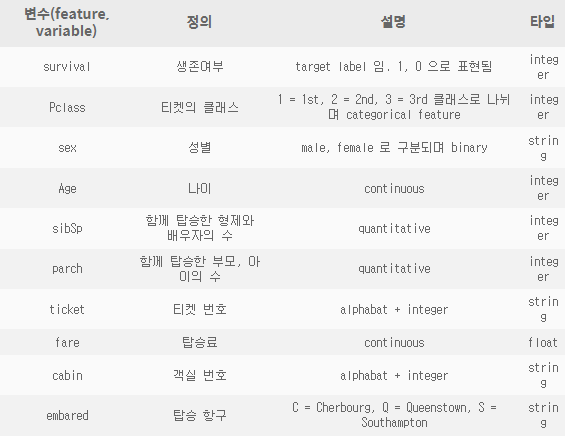

In [4]:
# 각 feature가 가진 통계치들을 반환해준다.
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


테이블에서 유추해보았을 때, null data가 존재하는 열(feature)가 존재하는 듯하다.
이를 시각화 해서 살펴보자.

### 1.1 Null data check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,
                                                                 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,
                                                                 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- train, test set에서 Age(20%), Cabin(80%), Embarked(0.22)의 null data가 존재한느 것을 확인.
- MANO라는 라이브러리를 사용해서 null data의 존재를 더 쉽게 볼 수 있다.

<AxesSubplot:>

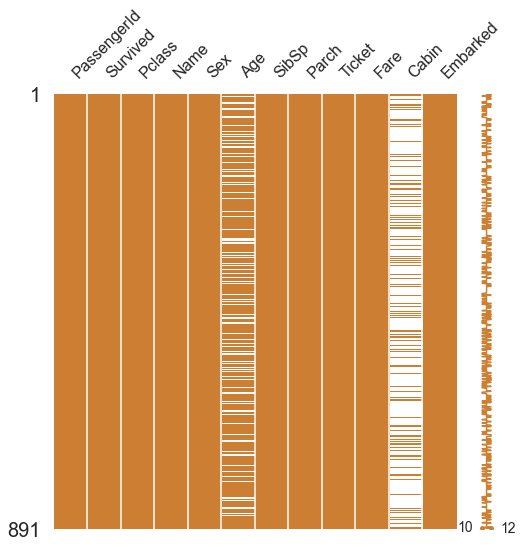

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

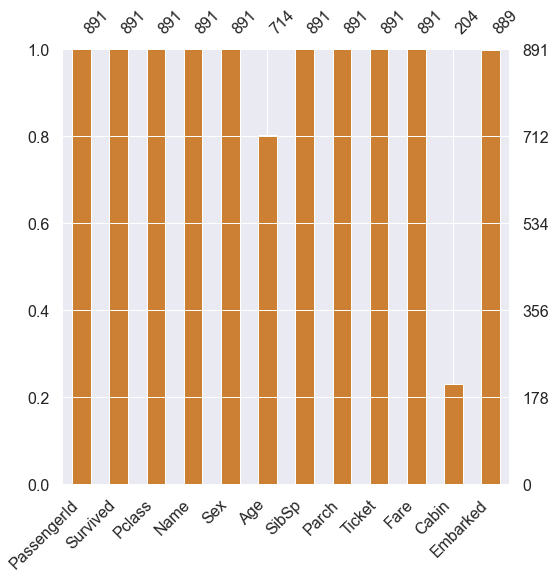

In [9]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

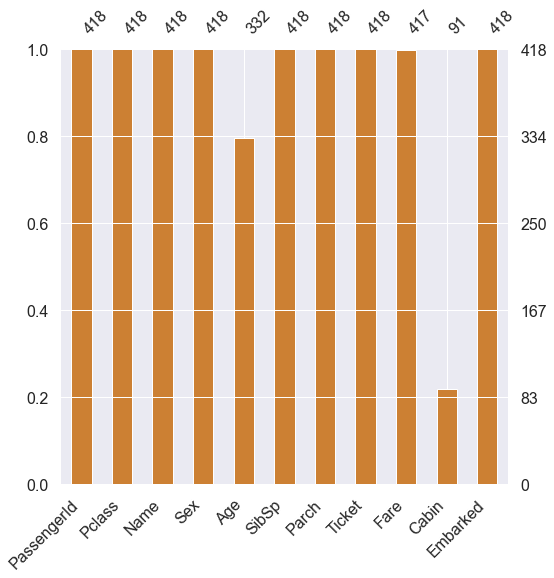

In [10]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

### 1.2 Target label 확인
- target label이 어떤 distribution을 가지고 있는지 확인해 봐야 한다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

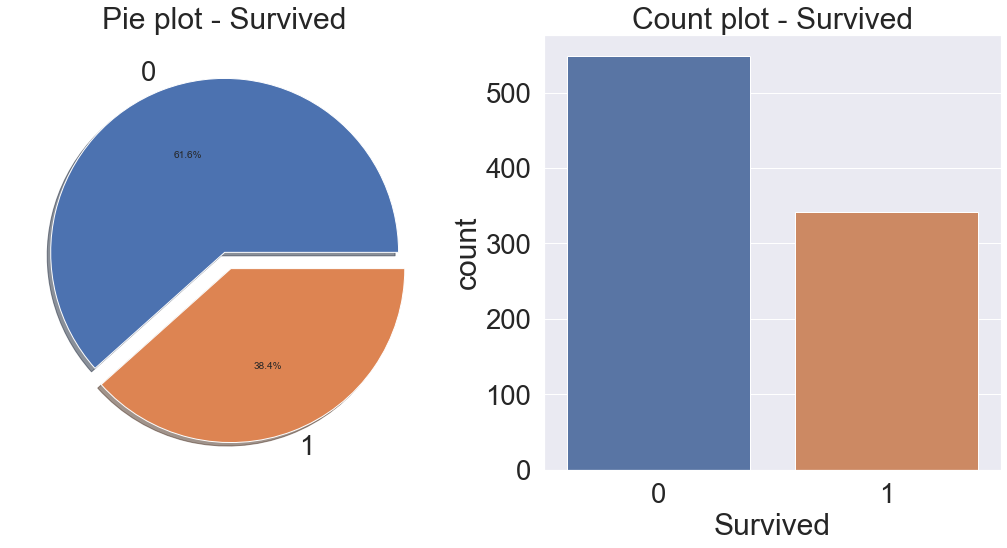

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                             autopct='%1.1f%%', 
                                             ax=ax[0], 
                                             shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 죽은 사람이 더 많다
- 38.4 %가 살아남았다.
- Target label의 분포가 제법 균일하다. 불균일할 경우, ex, 100중 1이 99, 0이 1개인 경우, 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 된다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 된다.

## 2. Exploratory Data Analysis
- 이제 본격적으로 데이터 분석을 해보자. 데이터는 매우 많다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해서 적절한 시각화가 필요함.
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편하다.

### 2.1 Pclass
- 먼저 `Pclass`에 대해서 살펴보자. `Pclass`는 ordinal, 서수형 데이터이다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
- 먼저 `Pclass`에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있다. 또한 pivot이라는 메소드도 있다.
- `Pclass`, `Survived`를 가져온 후, pclass로 묶는다. 그리고 각 pclass마다 0, 1이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나온다.

In [12]:
# count()를 하면, 각 class에 몇 명이 있는지 확인
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# sum()을 하면, 216명 중, 생존한 사람(=1)의 총합을 준다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# crosstab을 사용하면 좀 더 위 과정을 수월하게 확인 가능
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

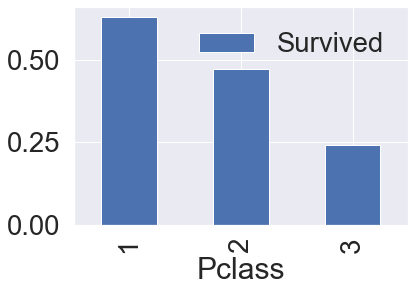

In [15]:
# grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass가 좋을수록 생존률이 높다.
- 보기 좋게 그래프를 그려보자

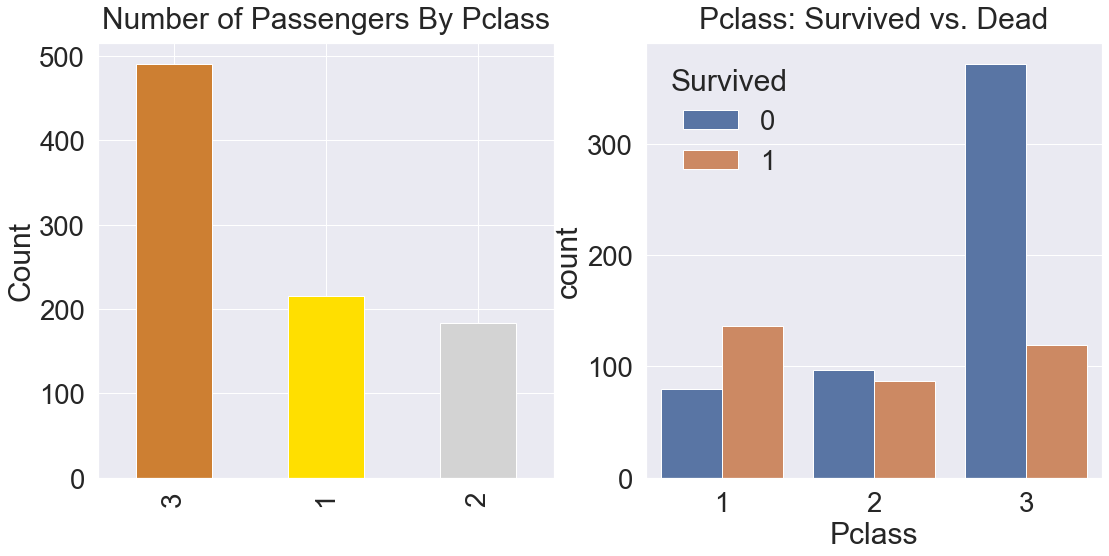

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)
plt.show()

생존률이 높을수록, 생존 확률이 높은 걸 확인할 수 있다. 따라서, 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해 볼 수 있고, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다.

### 2.2 Sex
- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보자.
- 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화 해보자.

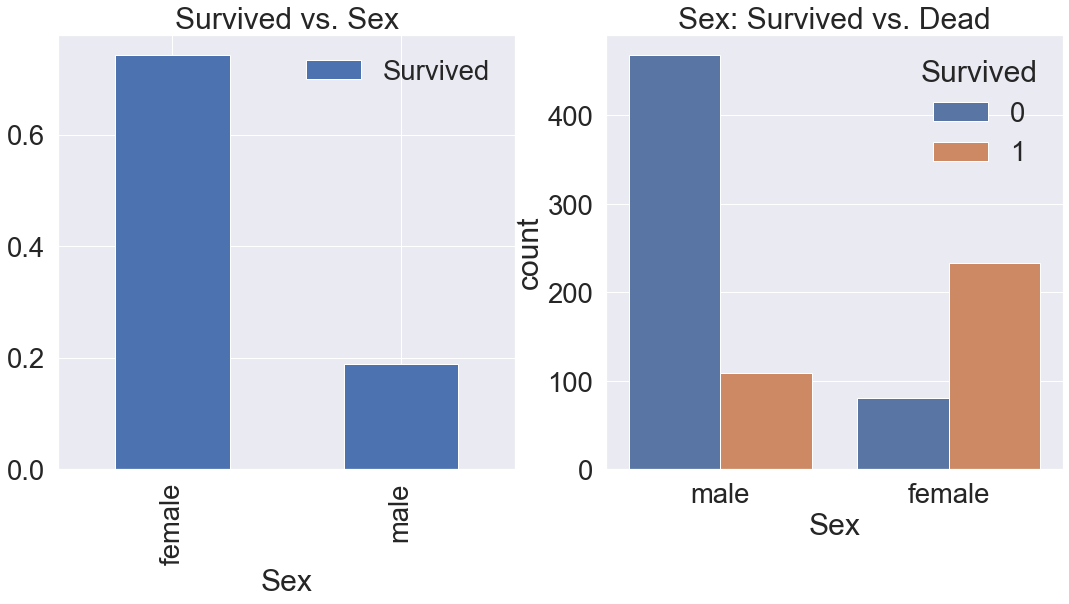

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


`Pclass`와 마찬가지로 `Sex`도 예측 모델에 쓰일 중요한 feature임을 알 수 있었다.

### 2.3 Both Sex and Pclass
- 이번에는 `Sex`, `Pclass` 두가지에 관하여 생존이 어떻게 달라지는지 확인해 보자.
- seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

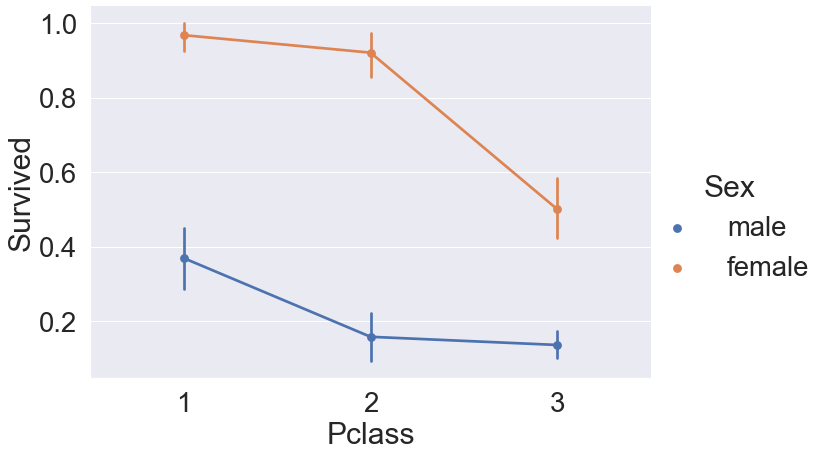

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train,
              size=6, aspect=1.5)

- 모든 클래스에서 female이 살 확률이 male 보다 높다.
- 또한, 남자/여자 상관없이 클래스가 높을 수록 살 확률이 높다
- hue 대신 column으로 하면 아래와 같다.

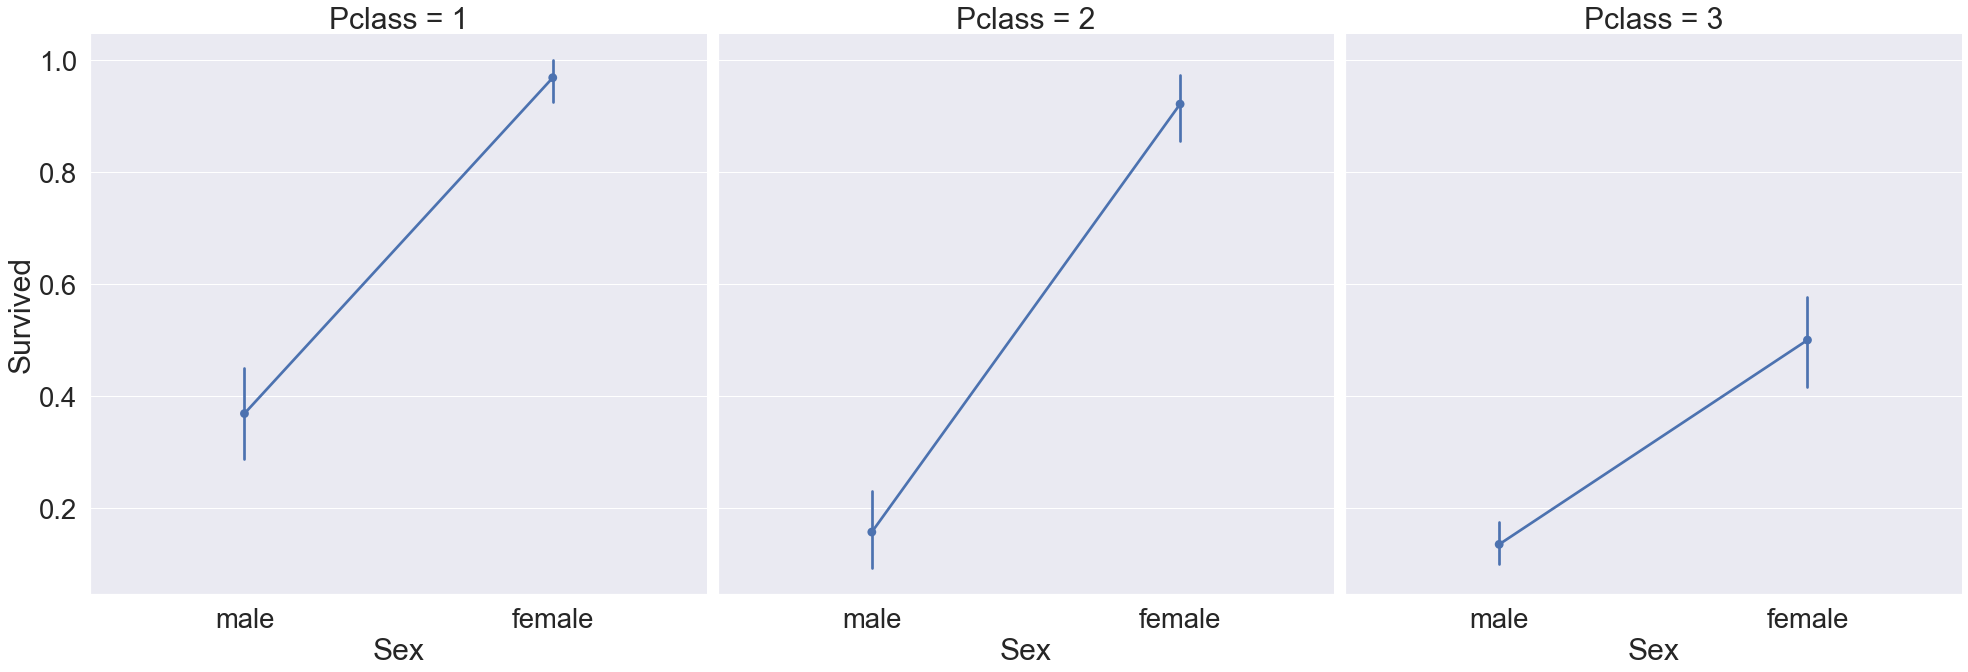

In [21]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, saturation=.5,
              size=9, aspect=1)

### 2.4 Age
- 이번에는 Age feature를 살펴보자.

In [23]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


- 생존에 따른 Age의 histogram을 그려보자.

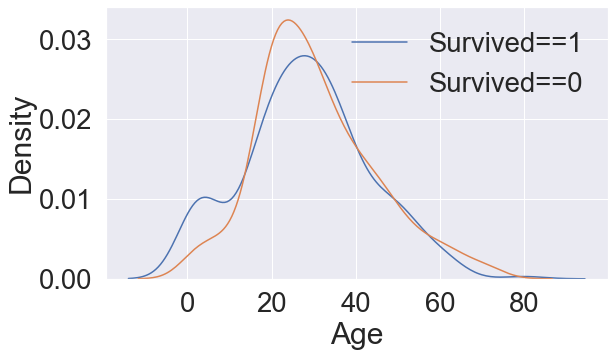

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

- 보다시피, 생존자 중 나이가 얼니경우가 많음을 알 수 있다.

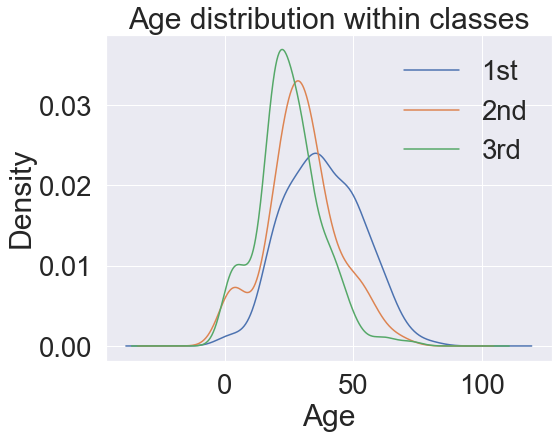

In [25]:
# Age distribution with classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age distribution within classes')
plt.legend(['1st', '2nd', '3rd'])

- classes가 높을수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존율을 확인하고자 함
- 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 보자.

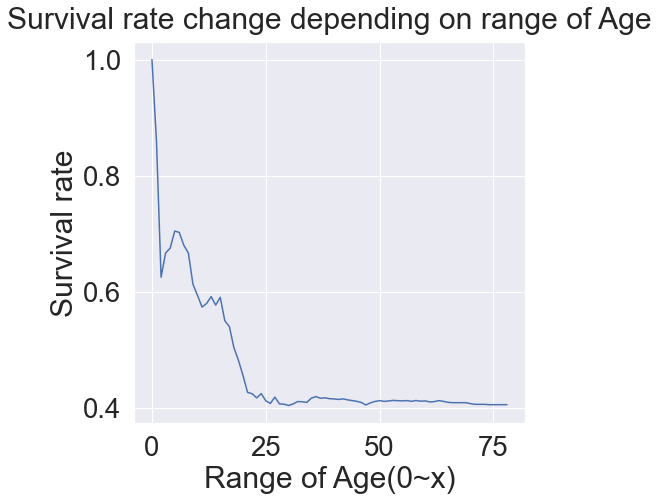

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 확실히 높음
- 우리는 이 나이가 중요한 feature로 쓰일 수 있음을 확인

### Pclass, Sex, Age
- 지금까지 본 `Sex`, `Pclass`, `Age`, `Survived` 모두에 대해서 보고싶다. 이를 쉽게 그려주는 것이 `seaborn`의 `violinplot`이다.
- x 축은 우리가 나눠서 보고 싶어하는 case(여기에선 `Pclass`, `Sex`)를 나타내고, y축은 보고싶어하는 distriburtion(Age)이다.


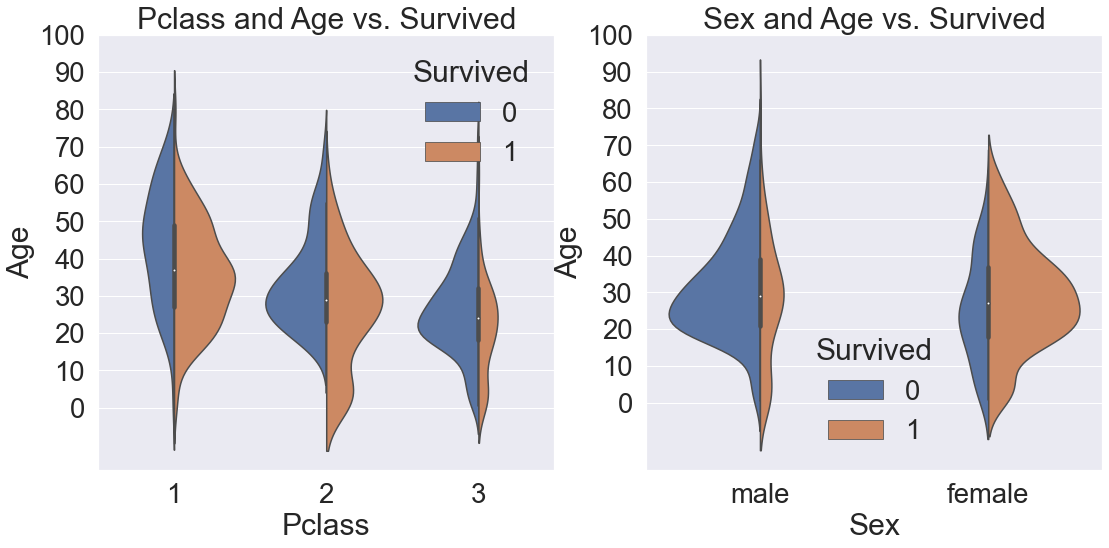

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train,
              scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train,
              scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽, Pclass 별로 Age의 distribution을 보여줌
- 오른쪽, Sex, 생존에 따른 distribution이 어떻게 다른지 보여줌
- 생존 측면에서, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있다.
- 오른쪽, 명확히 여자가 생존을 많이 함
- 여성과 아이를 먼저 챙긴 것을 유추

### 2.6 Embarked
- Embarked: 탑승한 항구
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률 확인

<AxesSubplot:xlabel='Embarked'>

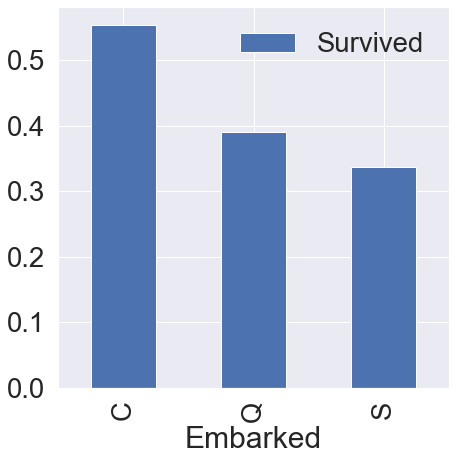

In [30]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 조금의 차이는 있지만, 생존률은 비슷함.
- 모델에 얼마나 큰 영향을 미칠지는 모르지만, 그래도 사용
- 사실, 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인할 수 있다.
- 다른 feature로 split하여 살펴보자

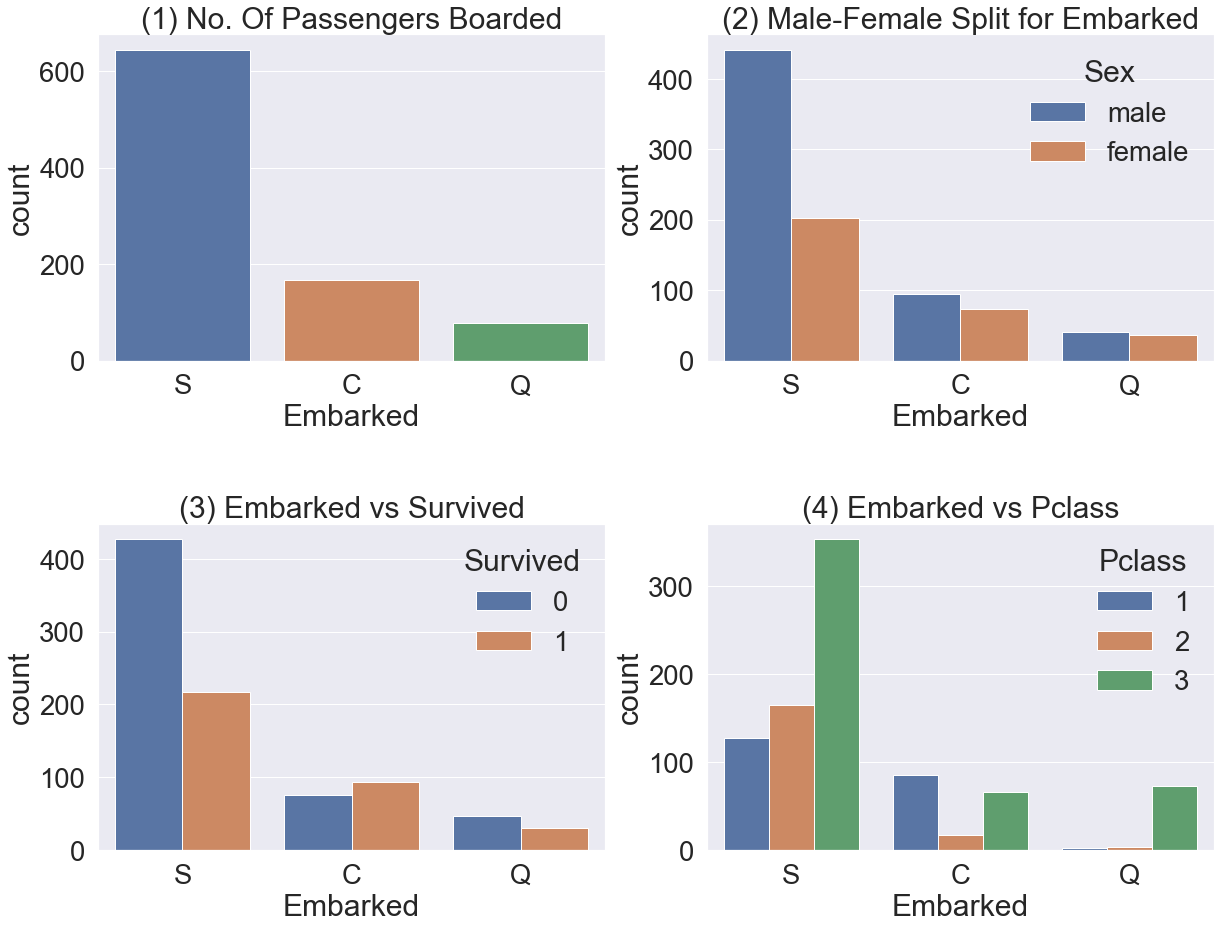

In [31]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- (1): 전체적으로 봤을 때, S에서 많은 사람이 탑승
- (2): C와 Q는 남녀 비율이 비슷하고, S는 남자가 더 많음
- (3): 생존확률이 S 경우, 많이 낮은 걸 볼 수 있음
- (4): C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그런듯.

### 2.7 Family - SibSp(형제자매) + Parch(부모, 자녀)
- `SibSp`와 `Parch`를 합하면 Family가 될 것이다. Family로 합쳐서 분석해보자.

In [32]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


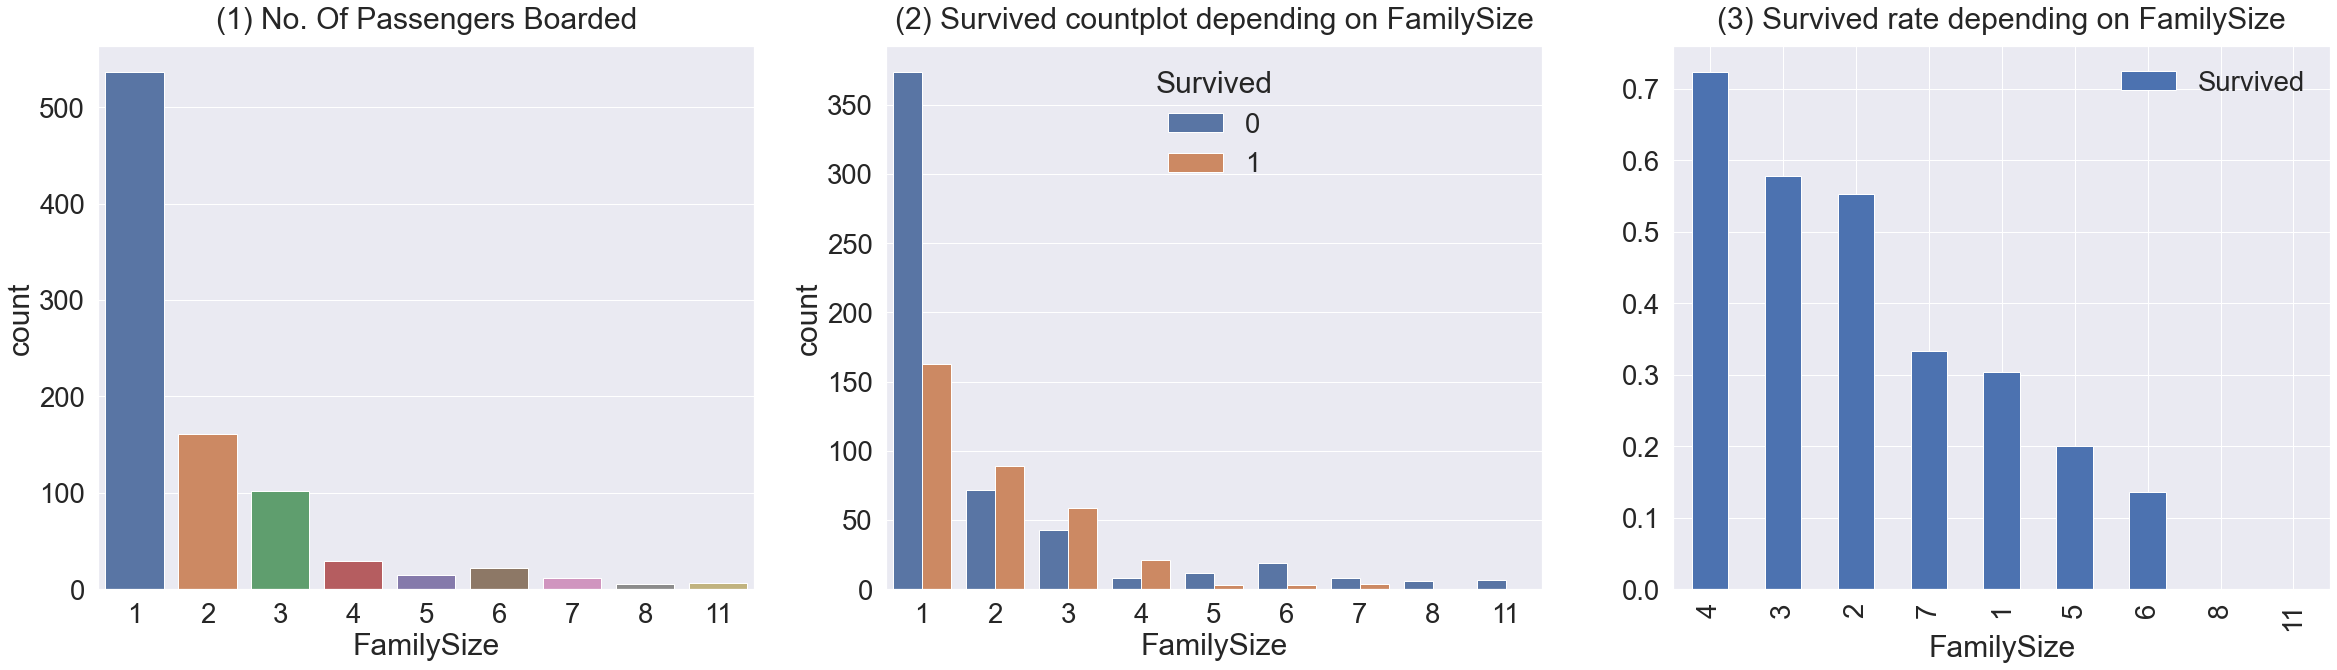

In [33]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가족 크기가 1~11까지 있음
- 가족 크기에 따른 생존 비교. 가족이 4명인 경우 확률이 가장 높음
- 3~4명 선에서 생존확률이 높은 걸 확인

### 2.8 Fare
- Fare: 탑승요금, continous feature이다. histogram을 그려보자.

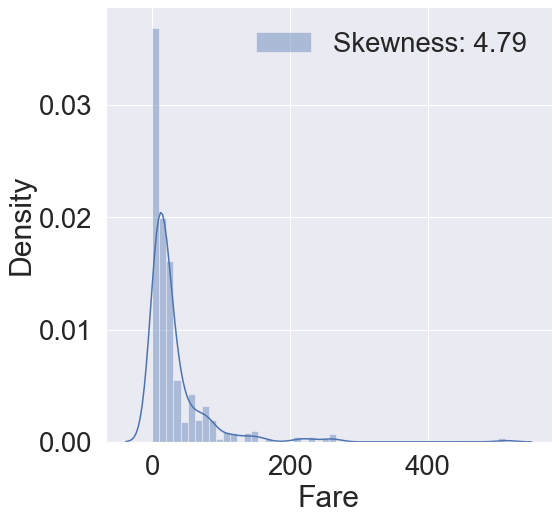

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭, 만약 이대로 모델에 넣어준다면 모델이 잘못 학습할 수도 있음
- outlier의 영향을 줄이기 위해 `log`를 취하자.
- pandas의 유용한 기능을 사용할 것. (`map`, `apply`)
- `lambda` 함수를 사용해 `map`에 인수로 넣어주면, Fare columns 데이터에 그대로 적용 가능

In [35]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i:np.log(i) if i>0 else 0)

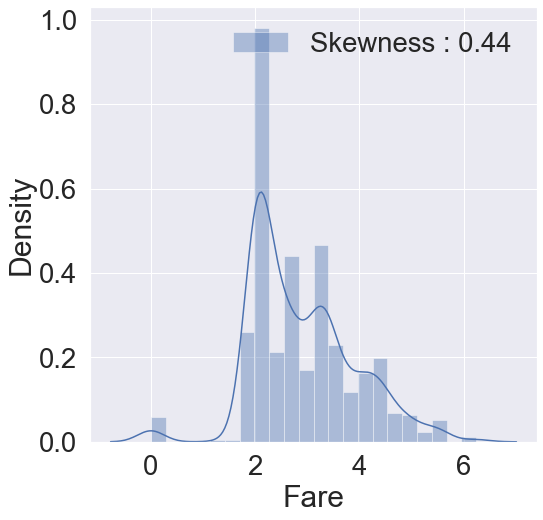

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- `log`를 취하니, 이제 비대칭성이 많이 사라진 것을 확인
- 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
- 사실 이것은 feature engineering에 들어가는 부분인데, 여기서 작업함
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 함.

### 2.9 Cabin
- 이 feature는 `NaN`이 대략 80%이므로, 모델에서 제외하자.

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 Ticket
- 이 feature는 `NaN`은 없다. String data이므로 모델에 넣을때 추가 작업들이 필요하다.

In [38]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
315084      1
347064      1
2629        1
13214       1
7267        1
Name: Ticket, Length: 681, dtype: int64

- ticket number는 매우 다양하다. 우리는 여기서 어떤 feature를 끌어내서 생존과 연결 시킬 수 있을까?
- 아이디어를 내보자.

# THE END